In [1]:
# Linear algerabra 
import numpy as np
# Data processing , CSV file I/O (e.g. pd.read_csv)
import pandas as pd
# Statical data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# functions for intracting with OS 
import os

In [2]:
for dirname,  _, filenames in os.walk ('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input/train.csv
input/test.csv
input/gender_submission.csv


In [19]:
training = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.nan

all_data = pd.concat([training, test])
# print(all_data)

%matplotlib inline
all_data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [25]:
# Quick look at our data type, shape if dataset, and null counts

training.info()

# Check Age has 177 null values, Cabin and embarked also have few null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [26]:
# To better understand the numeric data, use .describe() method. Understand the central tendenciesof data

training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [31]:
# Quick way to separate numeric columns

training.describe().columns


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [32]:
# Look at numeric and categorical values seprately

df_numeric = training[['Age', 'SibSp', 'Parch', 'Fare']]
df_categry = training[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

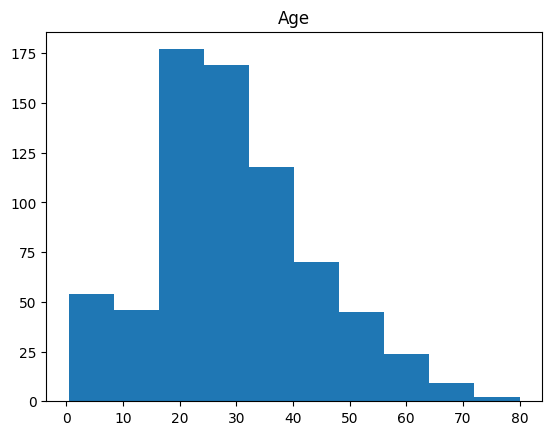

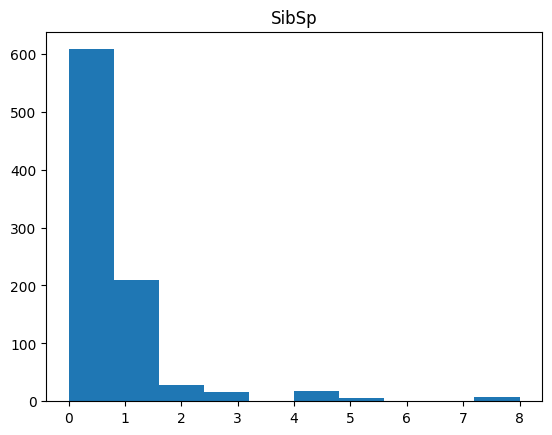

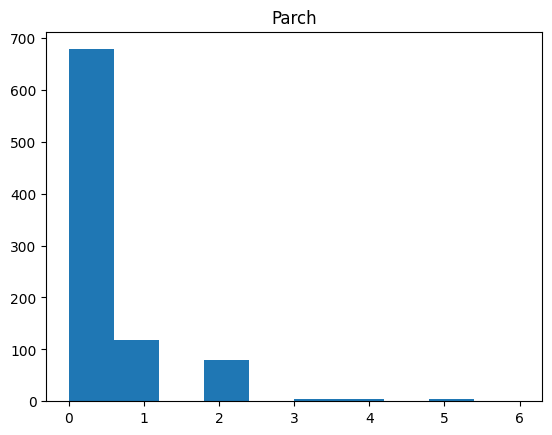

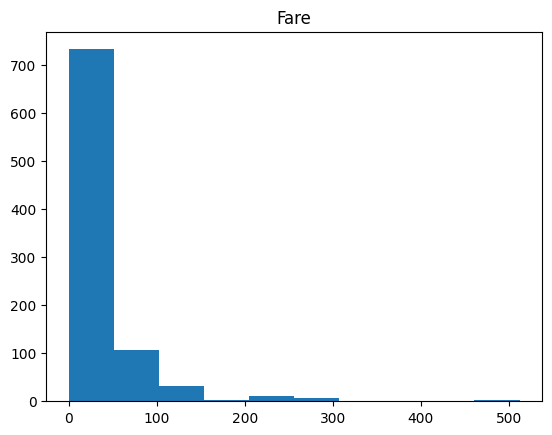

In [36]:
# Distribution for all numeric varibles

for i in df_numeric.columns:
    plt.hist(df_numeric[i])
    plt.title(i)
    plt.show()